#  FLIT/ UTIVA Project 
# Project title: Market Basket Analysis

---


**__Author__: Rabiat Ohunene Ibrahim**

  ---

## **Content**


1. [Introduction](#intro)
   - 1.1 [About the dataset](#about)
   - 1.2 [Methodology](#method)
   - 1.3 [Key insights](#key)


2. [Data Wrangling](#wrang)
    - 2.1 [Accessing](#access)
    - 2.2 [Cleaning](#clean)
    

3. [Exploratory Data Analysis](#eda)
   - 3.1 [Data preparation](#prep)
   - 3.2 [Exploration](#explore)
   - 3.2 [Visualization](#vis)

   

4. [Market Basket Analysis](#mba)
   - 4.1 [Data Preprocessing](#Dprep)
   - 4.2 [Data Encoding](#encod)
   - 4.3 [Apriori transformation](#Apri)
   - 4.4 [Rules table formation](#rule)
   

5. [Result Analysis](#mode)
    - 5.1 [Metric analysis](#met)
    - 5.2 [Item Network analysis](#net)
    - 5.3 [Heat map analysis](#map)
    

6. [Recommendation and Conclusion](#con)
    - 6.1 [Recommendation](#rec)
    - 6.2 [Conclusion](#conl)

<a name="intro"></a>
# 1. Introduction
---
### Overview
---
Market basket analysis is a data mining method that enables retailers or shopping stores to improve their sales by understanding their customers' transaction patterns. All the customers’ daily transaction histories are recorded to create the dataset which is critically analysed to reveal product grouping and products that a likely to be bought together in one transaction. By identifying which products tend to be bought together, the company can make informed decisions to improve sales and customer satisfaction. For more information see [here](https://www.techtarget.com/searchcustomerexperience/definition/market-basket-analysis).


<a name="about"></a>
## 1.1 About the Dataset
---

The Market basket dataset contains over 38,000 transactions made by customers shopping for groceries. The dataset timeline spans between 2014 and 2015. Below is a brief description of the dataset features: 

> Member_number:  Integer, contains the customers’ ID or number

> Date: Object, recorded date of each transaction

> ItemDescription: Object, the product purchased by the customer.


<a name="method"></a>
   ## 1.2 Methodology
   ---
   ### (a) Objective of the Project
 The goal of this work is to perform market basket analysis to uncover patterns in customer purchasing behavior. To achieve this goal, we commenced with the following objectives:
      
   **(1.) Explore the dataset to understand some preliminary patterns such as:**
   
           (a) Mostly purchased items
           (b) Monthly and yearly sales pattern
         
   **(2.) Perform market basket analysis to uncover products that a likely bought together.** 
   
   **(3) Make recommendations based on our results.**

   
   ### (b) Method and Approach
   
We begin by performing the wrangling process on the dataset to familiarize and clean up the dataset. Next, we carried out the exploratory data analysis and highlighted some useful insights from the data. We further carried out data processing to prepare the data for the market basket analysis. We performed the market basket analysis and visualized our results.
   
   
   ### (c) Tools used
     (i) We used the TransactionEncoder to transform the dataset into a form understandable to the apriori algorithm.
    (ii) Next, we used the Apriori algorithm to identify frequent items in the dataset which was then used to implement the association rule. We chose the Apriori algorithm because of its simplicity, ease of
    implementation, and interpretability. 
    
    (iii) We created our rule table by implementing association. 
    
    (iii) We visualized the results obtained to gain insights and make recommendations
     
    
<a name="key"></a>
   ## 1.3 Key insights
   ---
   > 1. In our exploration, the most frequently bought item was `whole milk` followed by `vegetables `and `buns`. The highest sales by the company happened in August 2015. We also noticed that the company made more transactions in 2015 compared to 2014.

 
 > 2. Our market basket analysis showed that `yogurt`, `whole milk`, and `sausage` are most likely to be bought together.


<a name="wrang"></a>
# **2. Data Wrangling**

---
<a name="access"></a>
## 2.1 Accessing:
In this section, we load and access the data to check for missing, duplicated, and wrong data type.

In [1]:
#pip install mlxtend

In [2]:
#Import all relevant libraries
import pandas as pd
import dateparser
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#Loading in the datasets
df = pd.read_csv("MBAG_DATA.csv")

In [4]:
#Check out the first few columns
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# Checking out the data info and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


***prob1: We noticed that the date column is using the object datatype instead of datetime.***

In [6]:
# Checking for missing values
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
# Checking for duplicated values
df.duplicated().sum()

759

***prob2: There are 759 duplicated values in the dataset***

In [8]:
# Checking the shape of the dataset
df.shape

(38765, 3)

<a name="clean"></a>
### 2.2 Cleaning: 
---
Some cleaning requirements for the dataset are as listed:

> a. Converting date from `Object` to `datetime` datatype.

> b. Drop all duplicated values.

In [9]:
# Converting to datetime
df["Date"] = pd.to_datetime(df["Date"])

/var/folders/_9/z4llrcqd0y122r7_nwdcm5900000gn/T/ipykernel_79791/2305791711.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [10]:
# Checking to see Date in datetime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [11]:
# Dropping duplicated values
df = df.drop_duplicates()

In [12]:
# checking if all duplicated values are drop
assert df.duplicated().sum() ==0

<a name="eda"></a>
# 3. Exploratory Data Analysis

---
<a name="prep"></a>
## 3.1 Data preparation

1. Extraction of the `Day`, `Month` and `Year` variables from the date feature.

In [13]:
# Extracting the day, month and year

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year

In [14]:
# Viewing the first few columns of the transformed dataset
df.head()

,Member_number,Date,itemDescription,day,month,year
0,1808,2015-07-21,tropical fruit,21,Jul,2015
1,2552,2015-05-01,whole milk,1,May,2015
2,2300,2015-09-19,pip fruit,19,Sep,2015
3,1187,2015-12-12,other vegetables,12,Dec,2015
4,3037,2015-01-02,whole milk,2,Jan,2015


<a name="explore"></a>
## 3.2 Exploration
---

In [15]:
# Checking the numbers of unique customers
df.Member_number.nunique()

3898

In [16]:
# Numbers of unique items
df.itemDescription.nunique()

167

In [17]:
# Convert members number to string for easy analysis
df["Member_number"] = df["Member_number"].astype("str")

In [18]:
# Checking the 10 most frequent customer to the store
df["Member_number"].value_counts().nlargest(10)

3180    35
3737    33
3050    32
2051    31
3915    30
2433    30
2625    30
2851    29
2394    29
3872    29
Name: Member_number, dtype: int64

<a name="vis"></a>
## 3.3 Visualizations
**In this section, we aim to answer the following questions:**

    (1) Which items are most frequently bought?
    (2) How are the monthly variation sales between 2014 and 2015?   
    (3) Which customers make the most frequent transactions?

## 1. Which item is most frequently bought?.

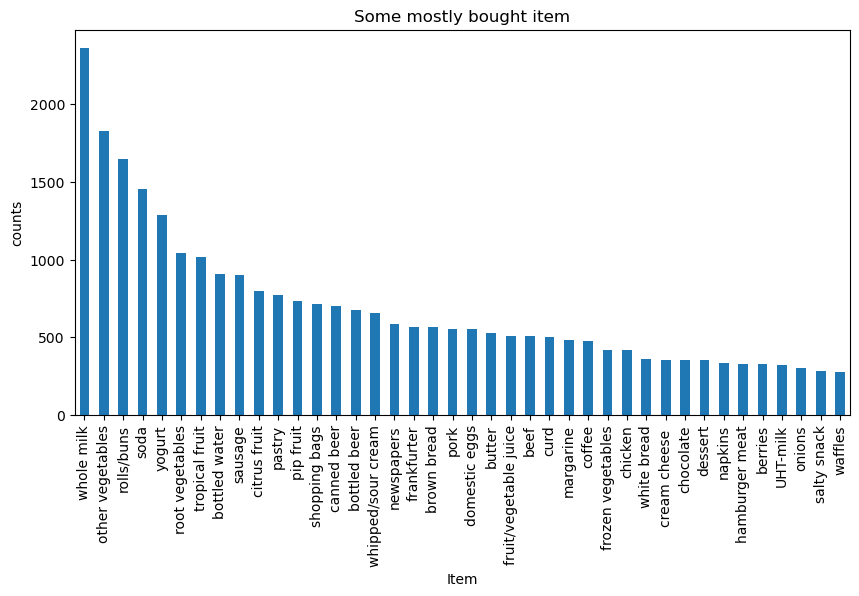

In [19]:
plt.figure(figsize=(10, 5))
df["itemDescription"].value_counts().nlargest(40).plot(kind= "bar")
plt.title("Some mostly bought item")
plt.xlabel("Item")
plt.ylabel("counts")
plt.show()

**Insight**
    
    We observed that the products like whole milk, vegetables, buns, soda, yogurt fruits, water, sausages, and 
    so on are the most frequently bought items. 

## 2. How is the monthly variation sales between 2014 and 2015?

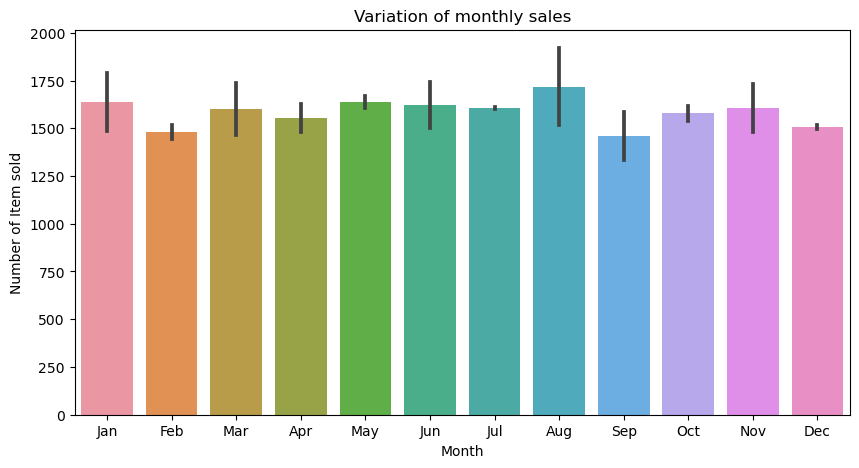

In [20]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Sort the DataFrame based on the categorical order
df = df.sort_values('month')

plt.figure(figsize=(10, 5))
monthdf=df.groupby(["month", "year"])['itemDescription'].count().reset_index()
sns.barplot(data=monthdf, x= "month", y = "itemDescription")
plt.title("Variation of monthly sales")
plt.xlabel("Month")
plt.ylabel("Number of Item sold")
plt.show()

**Insight**

    We observe that the company made most of its sales in August and January.

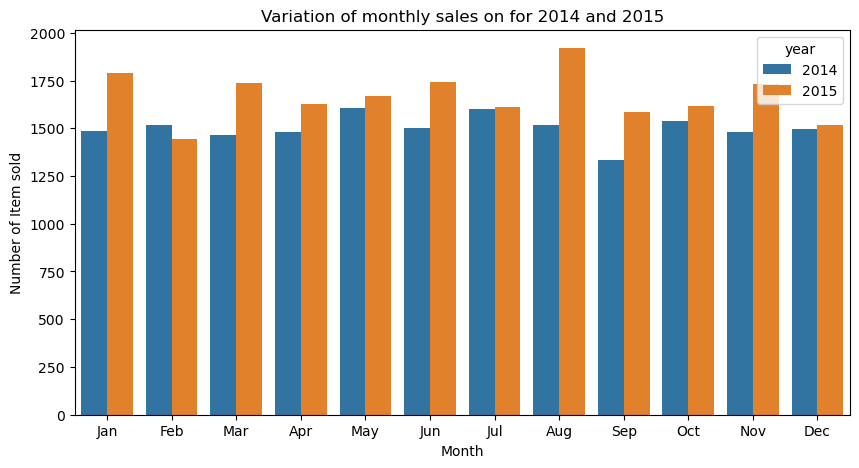

In [21]:
plt.figure(figsize=(10, 5))
monthdf=df.groupby(["month", "year"])['itemDescription'].count().reset_index()
sns.barplot(data=monthdf, x= "month", y = "itemDescription", hue = "year")
plt.title("Variation of monthly sales on for 2014 and 2015")
plt.xlabel("Month")
plt.ylabel("Number of Item sold")
plt.show()

 **Insight**
 
   We observed that the company sold more items in 2015 than in 2014. In 2014 the most sales were made in May while in 2015 the company made its highest sales in August.

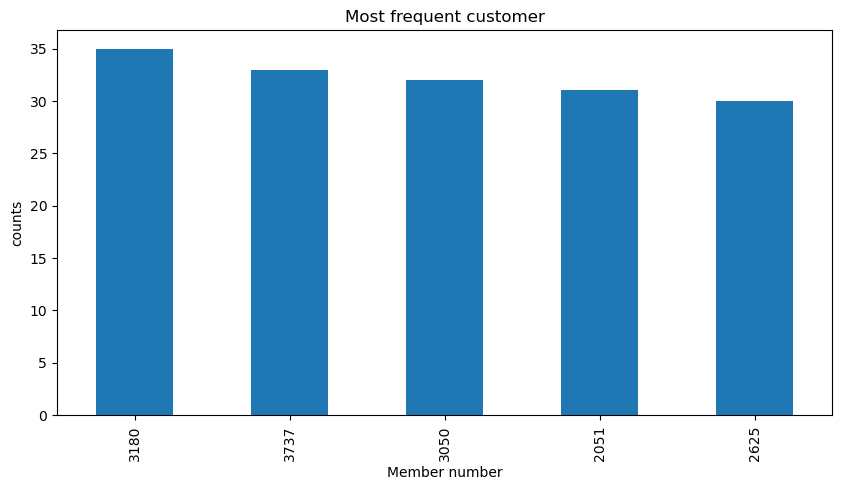

In [22]:
plt.figure(figsize=(10, 5))
df["Member_number"].value_counts().nlargest().plot(kind= "bar")
plt.title("Most frequent customer")
plt.xlabel("Member number")
plt.ylabel("counts")
plt.show()

**Insight**

The plot shows the 5 most frequent customers to the shop.

<a name="mba"></a>

# 4. Market Basket Analysis
---

<a name="Dprep"></a>
## 4.1 Data Preprocessing

In [23]:
# Group the items by Member_number and Date
basket_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

In [24]:
basket_df.shape

(14963, 3)

<a name="encod"></a>
## 4.3 Data Encoding
---

In [25]:
# Encoding the dataset
encoder = TransactionEncoder()
transaction_array = encoder.fit(basket_df['itemDescription']).transform(basket_df['itemDescription'])
transaction_df = pd.DataFrame(transaction_array, columns=encoder.columns_)

In [26]:
# Including the member number in the transaction data
transaction_df.index =  basket_df['Member_number']

In [27]:
# Viewing the first few columns of the transaction data
transaction_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<a name="Apri"></a>
## 4.4 Apriori transformation
---

In [28]:
# Extracting the most frequent item in the dataset using Apriori
frequent_itemsets = apriori(transaction_df, min_support=0.001, use_colnames=True)

In [29]:
# Visualizing the data
frequent_itemsets

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(sausage, rolls/buns, whole milk)"
746,0.001002,"(rolls/buns, soda, whole milk)"
747,0.001337,"(yogurt, rolls/buns, whole milk)"
748,0.001069,"(sausage, soda, whole milk)"


<a name="rule"></a>
## 4.4 Rules table formation
---

In [30]:
# Performing the association rules 
my_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [31]:
# Viewing the rules
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
...,...,...,...,...,...,...,...,...,...,...
235,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681,0.481231
236,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219,0.548014
237,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,7.967480e-04,1.013532,0.576701
238,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307,0.521727


<a name="mode"></a>
# 5. Result Analysis
---

<a name="met"></a>
## 5.1 Metric analysis
---

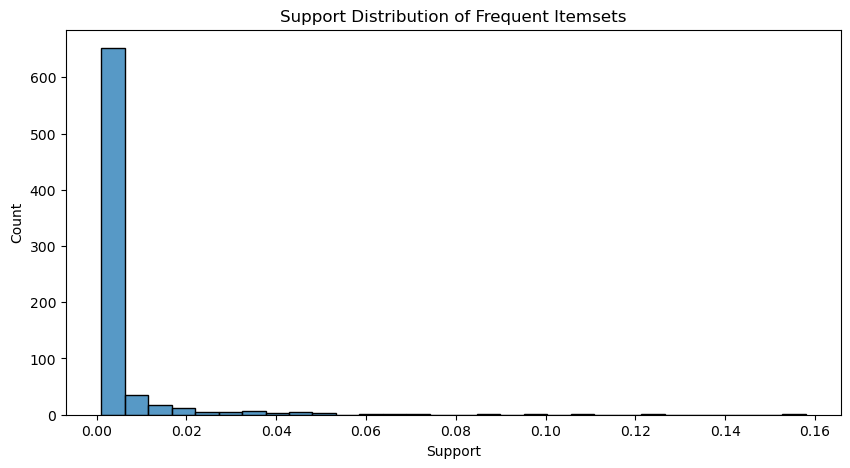

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(frequent_itemsets['support'], bins=30, kde=False)
plt.title('Support Distribution of Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Count')
plt.show()

**Insight**

    The support distribution is right-skewed. The tail of the distribution extends towards higher support values, indicating that while there might be a few item sets with relatively high support, the majority tend to have lower support.
    

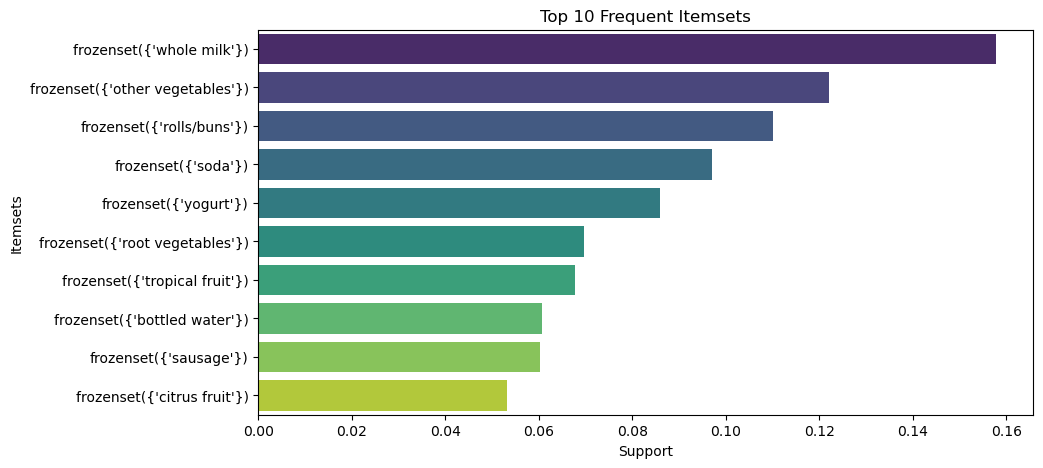

In [33]:
top_n = 10 

top_itemsets = frequent_itemsets.nlargest(top_n, 'support')

plt.figure(figsize=(10, 5))
sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='viridis')
plt.title(f'Top {top_n} Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

**Insight**
    
    The plot shows that items like whole milk, vegetables, and buns, have a higher support and occur more        frequently in the dataset. This implies that these items are frequently bought together with other items.

<a name="net"></a>
## 5.1 Item Network analysis
---

În this section, we show a network visualization of our rule.

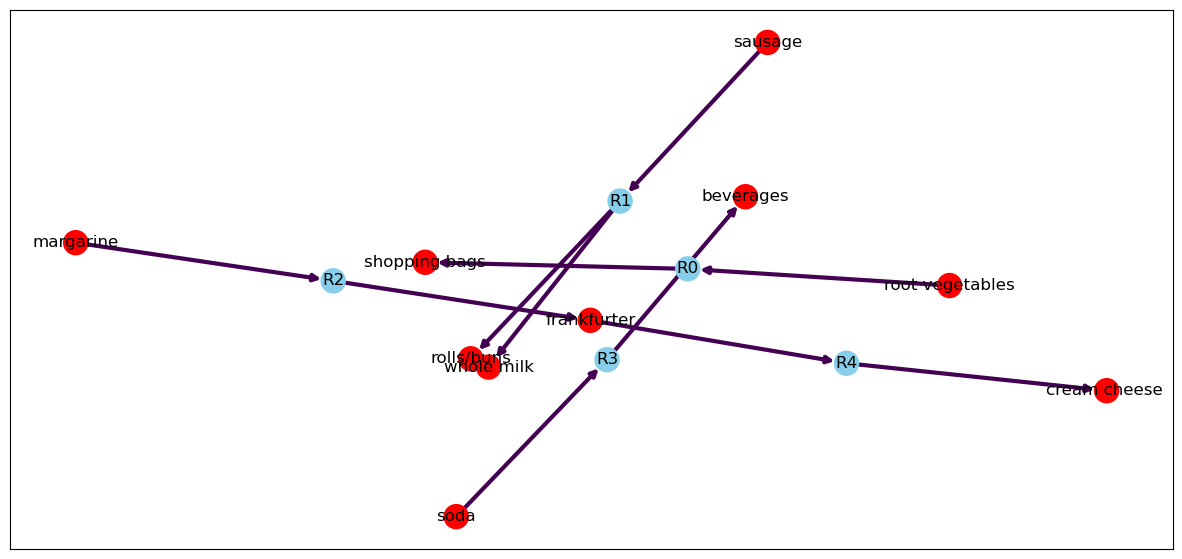

In [34]:
def Network_rules(rules, display_rules):
    """The function plots a network graph of antecedents and consequents
    It takes in datasets and number of values to be displayed ad inputs"""
    #Instantiate the graph
    G = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)    
    rule_strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']   
    
    # Define the nodes and edges
    for i in range(display_rules):      
        G.add_nodes_from(["R"+str(i)])
    
        for a in rules.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, "R"+str(i), color=colors[i], weight=3)
       
        for c in rules.iloc[i]['consequents']:
            G.add_nodes_from([a])
            G.add_edge("R"+str(i), c, color=colors[i], weight=3)
            
     # Define the color map for the nodes 
    for node in G:
        color_map.append('skyblue' if node in rule_strs else 'red')
    
    # Define zthe network layout
    pos = nx.kamada_kawai_layout(G, scale=2.0)
    
    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(15,7))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color=color_map, ax=ax)
    
    # Draw edges
    for (i, j, k) in G.edges(data=True):
        edge_color = [k['color']]  # Convert edge color to a list
        nx.draw_networkx_edges(G, pos, edgelist=[(i, j)], edge_color=edge_color, width=k['weight'], ax=ax)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax)
    
    # Show the plot
    plt.show()



# Calling function 
Network_rules(my_rules.sample(10), 5)


**Note** The arrow coming to the rules R0, R1, ..., R4(sky-blue circle) is from antecedents and the arrows going from rules R circle are towards consequents. The graph is dynamic and will change everything the code is run to show random samples of antecedents and their corresponding consequents from the rule table.


<a name="map"></a>
## 5.1 Heat map analysis
---


In [35]:
my_rules['antecedent_num'] = my_rules['antecedents'].apply(lambda x:len(x) )
my_rules[my_rules['antecedent_num']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_num
236,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014,2
235,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231,2
234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877,2
230,"(soda, whole milk)",(sausage),0.011629,0.060349,0.001069,0.091954,1.523708,0.000368,1.034806,0.347750,2
218,"(rolls/buns, whole milk)",(sausage),0.013968,0.060349,0.001136,0.081340,1.347825,0.000293,1.022849,0.261720,2


In [36]:
# Replace frozen sets with strings
my_rules['antecedents_items'] = my_rules['antecedents'].apply(lambda a: ','.join(list(a)))
my_rules['consequents_items'] = my_rules['consequents'].apply(lambda a: ','.join(list(a)))
my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_num,antecedents_items,consequents_items
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307,1,tropical fruit,UHT-milk
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402,1,UHT-milk,tropical fruit
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559,1,brown bread,beef
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891,1,beef,brown bread
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361,1,beef,citrus fruit


In [37]:
# Transform the DataFrame of rules into a matrix using the lift metric and 
#taking only entries with lift greater than 1

pivot_matrix = my_rules[my_rules['antecedent_num']>1].pivot(index = 'antecedents_items', 
                    columns = 'consequents_items', values= 'lift')
pivot_matrix

consequents_items,other vegetables,rolls/buns,sausage,soda,whole milk,yogurt
antecedents_items,,,,,,
"other vegetables,rolls/buns",NaN,NaN,NaN,1.108013,NaN,NaN
"other vegetables,soda",NaN,1.065785,NaN,NaN,NaN,NaN
"rolls/buns,soda",1.150651,NaN,NaN,NaN,NaN,NaN
"rolls/buns,whole milk",NaN,NaN,1.347825,NaN,NaN,1.114293
"rolls/buns,yogurt",NaN,NaN,NaN,NaN,1.082428,NaN
"sausage,rolls/buns",NaN,NaN,NaN,NaN,1.345594,NaN
"sausage,soda",NaN,NaN,NaN,NaN,1.138374,NaN
"sausage,whole milk",NaN,1.153275,NaN,1.229612,NaN,1.911760
"sausage,yogurt",NaN,NaN,NaN,NaN,1.619866,NaN


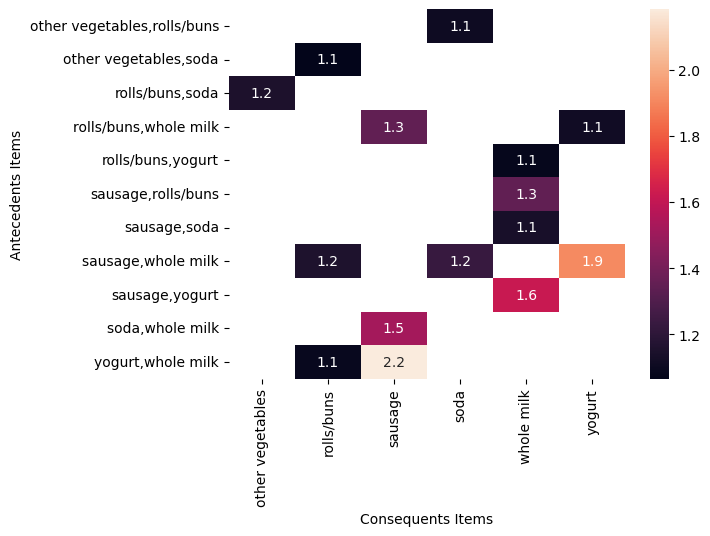

In [38]:
# Visualize the pivot matrix result with a heatmap and annotations on
sns.heatmap(pivot_matrix, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xlabel("Consequents Items")
plt.ylabel("Antecedents Items")
plt.show()

**Insights**
    
(1) From the heatmap, we can deduce that there exists a strong relationship between `yogurt`, `whole milk`, and `sausage`. These three items are likely to be bought together in a transaction.
    
(2) Customers who bought `soda` and `whole milk` are also likely to buy `sausage`.
    
(3) We can also observe some relationship between `buns`, `whole milk`, and `sausage`.

    

<a name="con"></a>
# 6. Recommendation and Conclusion
---


<a name="rec"></a>
## 6.1 Recommendation
---

From our analysis starting from exploration to the market basket analysis, we observed and made the following recommendations:
    
(1) Items such as whole milk, vegetables, buns, and yogurt are most frequently bought hence the retail companies should make sure these items are always in stock back checking on them daily. 
    
(2) The retail company can investigate the factors that are likely the major drive for the high sales in August and January 2015. These factors can be capitalized upon to improve sales.
    
(3) Knowing the most frequent customers to the store is good information that can be used by the company to perform customers' royalty programs and also encourage and draw in more customers.
    
(4) Items such as soda, whole milk, sausage, and yogurt are likely to be bought in a transaction. Hence:
    
    (i) The shelves containing these items can be placed close to each other for easy accessibility by 
    customers.
    
    (ii) These items can be bundled together as package sales such that the price is lower compared to each 
    price combined. This way will attract more sales and generate more income for the company.

 

<a name="conl"></a>
## 6.2 Conclusion
---

The goal of this project was to perform a market basket analysis to uncover patterns in customer purchasing behavior. We started by exploring accessing, cleaning then exploring the dataset. We performed the market basket analysis using a transaction encoder, Apriori algorithm, and associative rule. Our analysis shows that customers are likely to purchase Whole milk, yogurt, soda, buns, and sausage together. We made recommendations based on our analysis results. This information can be used by the retail company to make active decisions that can improve their sales and customer services.

![](https://media.istockphoto.com/id/1147584034/vector/thank-you-thanks-expressing-gratitude-note-on-a-sign.jpg?s=612x612&w=0&k=20&c=Pw2CDN2dgiYe4_pzh4PaZRyAahZf1u5iJE_xd4jQCao=)